In [1]:
!pip install pandas

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=UserWarning)

In [38]:
# Reading data into dataframes
Kayaking=pd.read_excel(r"/Users/rajnishkhatri/Downloads/V02Max_Combined.xlsx",sheet_name=0)
Athletes=pd.read_excel(r"/Users/rajnishkhatri/Downloads/V02Max_Combined.xlsx",sheet_name=1)
Triathlon=pd.read_excel(r"/Users/rajnishkhatri/Downloads/V02Max_Combined.xlsx",sheet_name=2)
Fencing=pd.read_excel(r"/Users/rajnishkhatri/Downloads/V02Max_Combined.xlsx",sheet_name=3)

In [8]:
Kayaking

,ID,time,RR,VO2,power
0,11.0,-168.600,727.0,0.287147,0.0
1,11.0,-167.872,728.0,0.287147,0.0
2,11.0,-167.148,724.0,0.287147,0.0
3,11.0,-166.484,664.0,0.320580,0.0
4,11.0,-165.836,648.0,0.320580,0.0
...,...,...,...,...,...
19473,16.0,1118.404,548.0,0.671957,0.0
19474,16.0,1118.944,540.0,0.671957,0.0
19475,16.0,1119.484,540.0,0.671957,0.0
19476,16.0,1120.016,532.0,0.671957,0.0


In [9]:
Kayaking.head()

,ID,time,RR,VO2,power
0,11.0,-168.600,727.0,0.287147,0.0
1,11.0,-167.872,728.0,0.287147,0.0
2,11.0,-167.148,724.0,0.287147,0.0
3,11.0,-166.484,664.0,0.320580,0.0
4,11.0,-165.836,648.0,0.320580,0.0


In [10]:
Kayaking.tail()

,ID,time,RR,VO2,power
19473,16.0,1118.404,548.0,0.671957,0.0
19474,16.0,1118.944,540.0,0.671957,0.0
19475,16.0,1119.484,540.0,0.671957,0.0
19476,16.0,1120.016,532.0,0.671957,0.0
19477,16.0,1120.544,528.0,0.671957,0.0


In [11]:
# Normalizing the column names to lowercase
Kayaking.columns = Kayaking.columns.str.lower()
Athletes.columns = Athletes.columns.str.lower()
Triathlon.columns = Triathlon.columns.str.lower()
Fencing.columns = Fencing.columns.str.lower()

# Columns list that we wants to keep
columns_kept = ['time', 'rr', 'power', 'vo2']

# Add missing columns with NaN values if they don't exist
def missing_columns(df, columns):
    for col in columns:
        if col not in df.columns:
            # Adding missing columns with NaN values
            df[col] = np.nan  

missing_columns(Kayaking, columns_kept)
missing_columns(Athletes, columns_kept)
missing_columns(Triathlon, columns_kept)
missing_columns(Fencing, columns_kept)

# Merge dataframes with suffixes which will differentiate the columns with same names in different dataframes
Merged_df = Kayaking[['id'] + columns_kept].merge(
    Athletes[['id'] + columns_kept], on='id', how='outer', suffixes=('_Kayaking', '_Athletes')
).merge(
    Triathlon[['id'] + columns_kept], on='id', how='outer', suffixes=('_Athletes', '_Triathlon')
).merge(
    Fencing[['id'] + columns_kept], on='id', how='outer', suffixes=('_Triathlon', '_Fencing')
)

# Combine columns and remove duplicates 
for col in columns_kept:
    cols_to_merge = [col + '_Kayaking', col + '_Athletes', col + '_Triathlon', col + '_Fencing']
    available_cols = [cl for cl in cols_to_merge if cl in Merged_df.columns]
    
    if available_cols:
        Merged_df[col] = Merged_df[available_cols].bfill(axis=1).iloc[:, 0]
    Merged_df.drop(columns=available_cols, inplace=True)

# Write the final dataframe to an Excel file
Merged_df.to_excel("/Users/rajnishkhatri/Downloads/MergedV02.xlsx", index=False)#I can see merged columns here

print("Merged Dataframe saved to excel successfully")

Merged Dataframe saved to excel successfully


In [12]:
#2nd question
# I took 'merged_df' as our dataframe

# Label Warm up which has all negative time values
Merged_df.loc[Merged_df['time'] < 0, 'status'] = 'Warm up'

# Label GET which has time >= 0 and power > 0
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] > 0), 'status'] = 'GET'

# By assuming cool down starts immediately after GET stage ends:
# It will be all rows where power drops to zero or very low value
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] == 0), 'status'] = 'Cool down'

print(Merged_df[['id','time','rr','power','vo2','status']])

# Save the final labeled dataframe to an Excel file
Merged_df.to_excel("V02Max_Labeled.xlsx", index=False)

print("Labeled dataframe saved to excel successfully")


         id     time     rr  power       vo2     status
0      11.0 -168.600  727.0    0.0  0.287147    Warm up
1      11.0 -167.872  728.0    0.0  0.287147    Warm up
2      11.0 -167.148  724.0    0.0  0.287147    Warm up
3      11.0 -166.484  664.0    0.0  0.320580    Warm up
4      11.0 -165.836  648.0    0.0  0.320580    Warm up
...     ...      ...    ...    ...       ...        ...
52057  18.0  947.288  536.0    0.0  0.507071  Cool down
52058  18.0  947.816  528.0    0.0  0.507071  Cool down
52059  18.0  948.344  528.0    0.0  0.507071  Cool down
52060  18.0  948.884  540.0    0.0  0.507071  Cool down
52061  18.0  949.424  540.0    0.0  0.507071  Cool down

[52062 rows x 6 columns]
Labeled dataframe saved to excel successfully


In [105]:
#1).Join all sport-related tables to produce one dataframe that has all athletes values
    #The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file

# Merging all three sports
df = [Kayaking,Triathlon,Fencing]
Merged_df = pd.merge(Kayaking,Triathlon,how ='outer').merge(Fencing,how ='outer')
# df_sporst = pd.concate([Kayaking,Triathlon,Fencing])

# Write the final dataframe to an Excel file
Merged_df.to_excel("/Users/rajnishkhatri/Downloads/MergedV02.xlsx", index=False)

print("Merged Dataframe saved to excel successfully")

Merged Dataframe saved to excel successfully


In [106]:
Merged_df


,ID,time,RR,VO2,power,RR_Diff
0,11.0,-168.600,727.0,0.287147,0.0,NaN
1,11.0,-167.872,728.0,0.287147,0.0,NaN
2,11.0,-167.148,724.0,0.287147,0.0,NaN
3,11.0,-166.484,664.0,0.320580,0.0,NaN
4,11.0,-165.836,648.0,0.320580,0.0,NaN
...,...,...,...,...,...,...
52057,10.0,942.700,428.0,0.786363,0.0,NaN
52058,10.0,943.124,424.0,0.786363,0.0,NaN
52059,10.0,943.552,428.0,0.786363,0.0,NaN
52060,10.0,943.976,424.0,0.786363,0.0,NaN


In [40]:
#2).Divide the rows into 3 parts: Warm up, GET and cool down using the data def. Label each row accordingly

# Label Warm up which has all negative time values
Merged_df.loc[Merged_df['time'] < 0, 'status'] = 'Warm up'

# Label GET which has time >= 0 and power > 0
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] > 0), 'status'] = 'GET'

# By assuming cool down starts immediately after GET stage ends:
# It will be all rows where power drops to zero or very low value
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] == 0), 'status'] = 'Cool down'

print(Merged_df[['ID','time','RR','power','VO2','status']])

# Save the final labeled dataframe to an Excel file
Merged_df.to_excel("V02Max_Labeled.xlsx", index=False)

print("Labeled dataframe saved to excel successfully")

         ID     time     RR  power       VO2     status
0      11.0 -168.600  727.0    0.0  0.287147    Warm up
1      11.0 -167.872  728.0    0.0  0.287147    Warm up
2      11.0 -167.148  724.0    0.0  0.287147    Warm up
3      11.0 -166.484  664.0    0.0  0.320580    Warm up
4      11.0 -165.836  648.0    0.0  0.320580    Warm up
...     ...      ...    ...    ...       ...        ...
52057  10.0  942.700  428.0    0.0  0.786363  Cool down
52058  10.0  943.124  424.0    0.0  0.786363  Cool down
52059  10.0  943.552  428.0    0.0  0.786363  Cool down
52060  10.0  943.976  424.0    0.0  0.786363  Cool down
52061  10.0  944.404  428.0    0.0  0.786363  Cool down

[52062 rows x 6 columns]
Labeled dataframe saved to excel successfully


In [41]:
#3).What was the average time each tested lasted excluding warm up for all athletes?

# Finding the avg_time
exc_warmup = Merged_df[Merged_df['status']!='Warm up']
avg_time = exc_warmup.groupby('status')['time'].mean().reset_index()
print(avg_time)

      status        time
0  Cool down  993.988405
1        GET  512.492916


In [43]:
#4).Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

# Finding te difference between RR intervals
Merged_df['RR_diff'] = Merged_df.groupby('ID')['RR'].diff()

# Calculating standard deviation for each athletes
Merged_df['HRV'] = Merged_df.groupby('ID')['RR_diff'].transform('std')

# Merging athletes table 
athlete_sport = Merged_df.merge(Athletes, on = 'ID',how = "outer")
athlete_sport.head(5)

# Finding the avg
average_hrv_sport = athlete_sport.groupby('sport')['HRV'].mean()

# Finding the sport with the highest average HRV
HRV_highest = average_hrv_sport.idxmax()
highest_avgerage_hrv_value = average_hrv_sport.max()
print(f"The sport with the highest HRV is '{HRV_highest}' with an avg hrv value of : {highest_avgerage_hrv_value:.2f}")


The sport with the highest HRV is 'kayak' with an avg hrv value of : 150.51


In [44]:
#5).What was the average time each test lasted (including warm up) for all athletes?

# Finding the average time
workout = Merged_df.groupby('status')['time'].mean().reset_index()
print(workout)

      status        time
0  Cool down  993.988405
1        GET  512.492916
2    Warm up  -90.058246


In [46]:
#6).What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? 
   #You may choose to show averages based on any one/all sports. 

# Filtering the specific sport:
df_athelets = pd.merge(Merged_df,Athletes,how = 'outer')
df_athelets = df_athelets[df_athelets['sport']=='fencing']
power_value = df_athelets[df_athelets['power']>0]
Most_common_power  =power_value['power'].value_counts().idxmax()

# Finding the avg time_second
Average_time = power_value[power_value['power']== Most_common_power]['time'].mean()
print(f"Most common power above 0:{Most_common_power}watts")
print(f"Average time for the sport fencing with watts is {Most_common_power}watts:time taken is {Average_time} seconds")


Most common power above 0:50.0watts
Average time for the sport fencing with watts is 50.0watts:time taken is 91.1603514211884 seconds


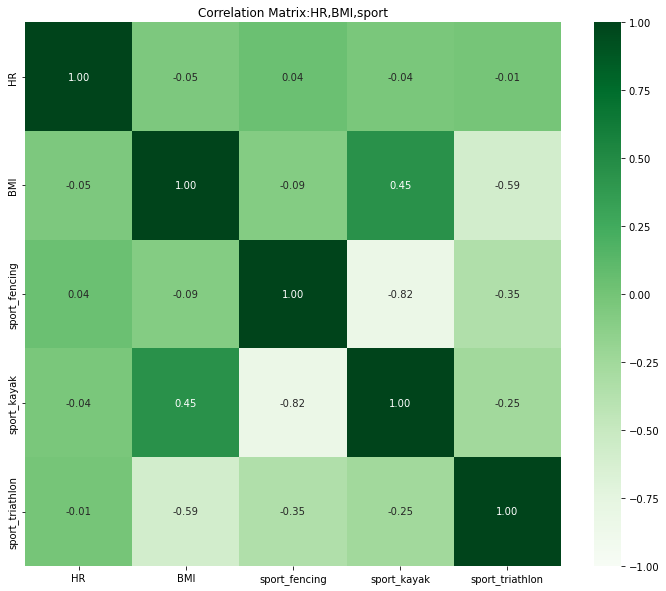

In [112]:
#7).Create a correlation matrix to show the relationship between HR, BMI and sport

# Finding the avg heartrate:
Merged_df['HR'] = 60/(Merged_df['RR']/1000)
avg_HR_ath = Merged_df.groupby('ID')['HR'].mean().reset_index()

# Finding bmi:
Athletes['BMI'] = round(Athletes['Weight']/(Athletes['Height']*2),2)
Merged_df1 = pd.merge(Merged_df,Athletes,on ='ID',how ='inner')

# Finding Correlation:
correlation_data = Merged_df1[['HR','BMI','sport']]
correlation_encoded = pd.get_dummies(correlation_data, columns = ['sport'])
correlation_matrix = correlation_encoded.corr()

# Freating a heatmap:
# plt.figure(figure = (12,10))
# sns.heatmap(correlation_matrix,annot = True,cmap = 'Greens',fmt ='.2f',vmin = -1,vmax = 1)

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Matrix:HR,BMI,sport')
plt.show()

In [55]:
#8).What are the names of the kayaking athletes?

# Merging first and lastname
Athletes['Full Name'] = Athletes['First Name'] + ' ' + Athletes['Last Name']

# Finding the athletes name
sport = Athletes[Athletes["sport"]== "kayak"]
print(sport[['Full Name','sport']])


           Full Name  sport
10  Isabella Griffin  kayak
11       Caleb Dixon  kayak
12     Mia Carpenter  kayak
13   Harper Mitchell  kayak
14     Mason Wallace  kayak
15    Logan Anderson  kayak


In [57]:
#9).What was the average HRV of the triathletes?

# Finding RR difference with each athlete
Triathlon['RR_Diff'] = Triathlon.groupby('ID')['RR'].diff()

# Finding std deviation from RR intervals
average_hrv = Triathlon.groupby('ID')['RR_Diff'].std()

# Finding the avg of RR
avg = average_hrv.mean()
print(f"The average HRV of the triathlon is {avg:.2f}")

The average HRV of the triathlon is 29.29


In [68]:
#10).How long was athlete 12 in HR Zone 5?

# Filtering the athlete 12 in HR Zone 5
df_filt = athlete_triathlon[(athlete_triathlon["ID"] == 12) & (athlete_triathlon["Zone"] == 'Zone 5 (Anaerobic)')]

# df_filt =athlete_triathlon[athlete_triathlon(["ID]"==12) & athlete_triathlon(["Zone"]=='Zone 5 ((Anaerobic)')]
# Total time spent in zone 5
Zone_5_time = df_filt['time'].sum()
print(f"Athlete 12 spent {Zone_5_time} seconds hr Zone 5.")

NameError: name 'athlete_triathlon' is not defined

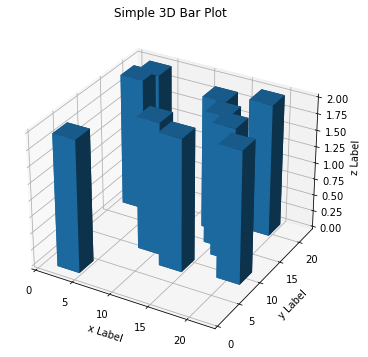

In [69]:
#11).Create any 3d plot using any data. Values do not have to be from the dataset given. 
 	
from mpl_toolkits import mplot3d
num_bars=10
#Random x,y and z coordinates for the bars
x = np.random.randint(1, 20, num_bars)
y = np.random.randint(1, 20, num_bars)
z = np.random.randint(1, 10, num_bars)

width = 3
#3d bar plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, np.zeros_like(z), width, width, 2)

#set labes and title
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')
ax.set_title('Simple 3D Bar Plot')

plt.show()

In [74]:
#12).What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

#Merging athletes table with another table
Athletes['Full Name'] = Athletes['First Name']+" "+Athletes['Last Name']
merged_athlete = Athletes.merge(Merged_df, on='ID', how = 'right')

#Total of all VO2 values per athlete
total_vo2_per_athlete = merged_athlete.groupby(['ID', 'Full Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete = total_vo2_per_athlete.reset_index(name = 'total vo2')

#Calculation of VO2max
total_vo2_per_athlete['VO2 Max'] = total_vo2_per_athlete['total vo2'] / total_vo2_per_athlete['Weight']

#Getting the 3 largest VO2 max values
highest_3_vo2_max = total_vo2_per_athlete.nlargest(3,'VO2 Max')
highest_3_vo2_max = highest_3_vo2_max[['ID', 'Full Name','sport','VO2 Max']]
print(highest_3_vo2_max)

      ID         Full Name  sport    VO2 Max
11  12.0       Caleb Dixon  kayak  92.258212
12  13.0     Mia Carpenter  kayak  90.758693
10  11.0  Isabella Griffin  kayak  89.586903


In [77]:
#13). Calculate the year of birth of each athlete and store it as a column in the tables 

#To find year of birth
from datetime import date
today = date.today()
Athletes['year of birth'] = today.year-Athletes['age']
print(Athletes)

      ID   age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1.0  15.0    53.7   161.0   50.0  140.0    fencing  Female   African   
1    2.0  15.0    56.2   162.0   80.0  127.0    fencing    Male   African   
2    3.0  16.0    89.9   191.0  155.0  300.0    fencing    Male     White   
3    4.0  16.0    76.5   180.0  215.0  275.0    fencing    Male     White   
4    5.0  17.0    76.4   186.0  110.0  172.0    fencing  Female     White   
5    6.0  17.0    65.6   169.0  131.0  186.0    fencing  Female     White   
6    7.0  15.0    49.8   165.0   65.0  108.0    fencing  Female     White   
7    8.0  15.0    51.2   165.0   80.0  133.0    fencing  Female     White   
8    9.0  14.0    57.1   176.0   50.0  125.0    fencing  Female   African   
9   10.0  14.0    58.8   177.0  101.0  162.0    fencing  Female   African   
10  11.0  18.0    84.8   182.0  174.0  268.0      kayak  Female   African   
11  12.0  18.0    86.0   183.0  170.0  294.0      kayak    Male   African   

In [80]:
#14).What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

# Merging athletes table with another table
Athletes['Full Name'] = Athletes['First Name']+" "+Athletes['Last Name']
merged_athlete = Athletes.merge(Merged_df, on='ID', how = 'right')

# Total of all VO2 values per athlete
total_vo2_per_athlete = merged_athlete.groupby(['ID', 'Full Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete = total_vo2_per_athlete.reset_index(name ='total vo2')

# Calculation of VO2max
total_vo2_per_athlete['VO2 Max'] = total_vo2_per_athlete['total vo2'] / total_vo2_per_athlete['Weight']

# Get the 3 smallest VO2 max values
lowest_3_vo2_max = total_vo2_per_athlete.nsmallest(3,'VO2 Max')

# Select and display the relevent columns
lowest_3_vo2_max = lowest_3_vo2_max[['ID', 'Full Name','sport','VO2 Max']]
print(lowest_3_vo2_max)

    ID        Full Name    sport    VO2 Max
6  7.0    Grace Simmons  fencing  38.403988
1  2.0   Ethan Reynolds  fencing  38.632602
0  1.0  Olivia Martinez  fencing  42.807730


In [82]:
#15).Assign 1 of the following 5 heart rate zones for every record for all sports and athletes
# and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max 
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)               120-135 HR max
#Zone 4 (lactate threshold)   135-155 HR max
#Zone 5 (anaerobic)           155+ HR max and above

# Merging table
athlete_triathlon = Athletes.merge(Merged_df, on ='ID', how = 'right')

# Finding HR Max
athlete_triathlon['HR'] = 60 / (athlete_triathlon['RR'] / 1000)

# Assigning zone
Zone_1 =  athlete_triathlon['HR'] <100
Zone_2 = (athlete_triathlon['HR'] >=100 ) & (athlete_triathlon['HR'] <120)
Zone_3 = (athlete_triathlon['HR'] >=120 ) & (athlete_triathlon['HR'] <135)
Zone_4 = (athlete_triathlon['HR'] >=135 ) & (athlete_triathlon['HR'] <155)
Zone_5 =  athlete_triathlon['HR'] >=155

# Asssigning the zones

athlete_triathlon.loc[Zone_1, 'Zone'] = 'Zone 1 (Recovery/Easy)'
athlete_triathlon.loc[Zone_2, 'Zone'] = 'Zone 2 (Aerobic/Base)'
athlete_triathlon.loc[Zone_3, 'Zone'] = 'Zone 3 (Tempo)'
athlete_triathlon.loc[Zone_4, 'Zone'] = 'Zone 4 (Lactate Threshold)'
athlete_triathlon.loc[Zone_5, 'Zone'] = 'Zone 5 (Anaerobic)'

# Final DataFrame to a new Excel file
output_file = 'Zonewise_athlete_data.xlsx'
athlete_triathlon.to_excel(output_file, index = False)
print(athlete_triathlon)

         ID   age  Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity  \
0      11.0  18.0    84.8   182.0  174.0  268.0    kayak  Female   African   
1      11.0  18.0    84.8   182.0  174.0  268.0    kayak  Female   African   
2      11.0  18.0    84.8   182.0  174.0  268.0    kayak  Female   African   
3      11.0  18.0    84.8   182.0  174.0  268.0    kayak  Female   African   
4      11.0  18.0    84.8   182.0  174.0  268.0    kayak  Female   African   
...     ...   ...     ...     ...    ...    ...      ...     ...       ...   
52057  10.0  14.0    58.8   177.0  101.0  162.0  fencing  Female   African   
52058  10.0  14.0    58.8   177.0  101.0  162.0  fencing  Female   African   
52059  10.0  14.0    58.8   177.0  101.0  162.0  fencing  Female   African   
52060  10.0  14.0    58.8   177.0  101.0  162.0  fencing  Female   African   
52061  10.0  14.0    58.8   177.0  101.0  162.0  fencing  Female   African   

      First Name  ... year of birth     time     RR       VO2  

In [84]:
#16).Calculate the BMI of every athlete and display it as a list.

# To find BMI
Athletes['BMI'] = round(Athletes['Weight']/(Athletes['Height']*2),2)

# Converting BMI column to list
BMI_list=Athletes['BMI'].tolist()
print("List of BMIs for each athlete:",BMI_list)

List of BMIs for each athlete: [0.17, 0.17, 0.24, 0.21, 0.21, 0.19, 0.15, 0.16, 0.16, 0.17, 0.23, 0.23, 0.23, 0.18, 0.18, 0.19, 0.13, 0.13]


In [ ]:
Q.33 Create a list and a tuple. Print the types and lengths of  both.

In [71]:

# # Load the dataset
file_path = '/Users/rajnishkhatri/Downloads/V02Max_Combined.xlsx'
df = pd.read_excel(file_path)

# Convert the DataFrame to a list and a tuple
data_list = df.values.tolist()
data_tuple = tuple(map(tuple, df.values))

# Print the types and lengths of both
print("List Type:", type(data_list))
print("List Length:", len(data_list))

print("Tuple Type:", type(data_tuple))
print("Tuple Length:", len(data_tuple))


List Type: <class 'list'>
List Length: 19478
Tuple Type: <class 'tuple'>
Tuple Length: 19478


Q.34 Display a word cloud using any values in the dataset.

In [14]:
!pip install wordcloud

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text data from a specific column or multiple columns
text = 'Here is some sample text to generate a word cloud. Add more words here. '.join(Athletes['sport'])  # For example, using the 'sport' column

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



ValueError: Only supported for TrueType fonts

In [104]:
from wordcloud import WordCloud
# Combine all text data from a specific column or multiple columns
text = ' '.join(Athletes['sport'])  # For example, using the 'sport' column

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example text
text = "Here is some sample text to generate a word cloud. Add more words here."

# Specify the path to a TrueType font file (.ttf)
font_path = '/Library/Fonts/Arial.ttf'  # Update this path based on your system

# Generate the word cloud using the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ValueError: Only supported for TrueType fonts

Q.35 Create a Regression Plot on Max V02 and mean BMI for any sport of your choice.

/var/folders/5w/th17csyd6r14gjdhdkkz0q0h0000gn/T/ipykernel_38801/1345124391.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sport_df['mean_BMI'] = mean_bmi


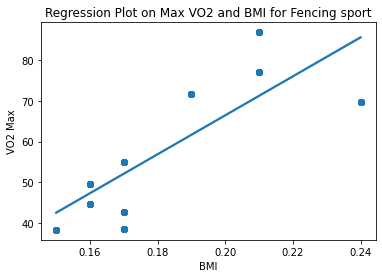

In [97]:
# Calculating BMI
Athletes['BMI'] = round(Athletes['Weight'] / (Athletes['Height'] * 2), 2)
Merged_df1 = pd.merge(Merged_df, Athletes, on='ID', how='inner')
Athletes['Full Name'] = Athletes['First Name'] + " " + Athletes['Last Name']
merged_athlete = Athletes.merge(Merged_df, on='ID', how='right')

# Calculating total VO2 per athlete
total_vo2_per_athlete = merged_athlete.groupby(['ID', 'Full Name', 'sport', 'Weight'])['VO2'].sum()
total_vo2_per_athlete = total_vo2_per_athlete.reset_index(name='total vo2')

# Calculating VO2 Max
total_vo2_per_athlete['VO2 Max'] = total_vo2_per_athlete['total vo2'] / total_vo2_per_athlete['Weight']

merged_athlete = merged_athlete.merge(total_vo2_per_athlete[['ID', 'VO2 Max']], on='ID', how='left')

# Filter data for the chosen sport
sport_df = merged_athlete[merged_athlete['sport'] == 'fencing']

#  Calculate the mean BMI
mean_bmi = sport_df['BMI'].mean()
sport_df['mean_BMI'] = mean_bmi

# Plot the regression plot
sns.regplot(x='BMI', y='VO2 Max', data=sport_df)

# Set title and labels
plt.title('Regression Plot on Max VO2 and BMI for Fencing sport')
plt.xlabel('BMI')
plt.ylabel('VO2 Max')

# Display the plot
plt.show()

Q.36 Plot the time series of HR( every 5 mins) of athlete 1

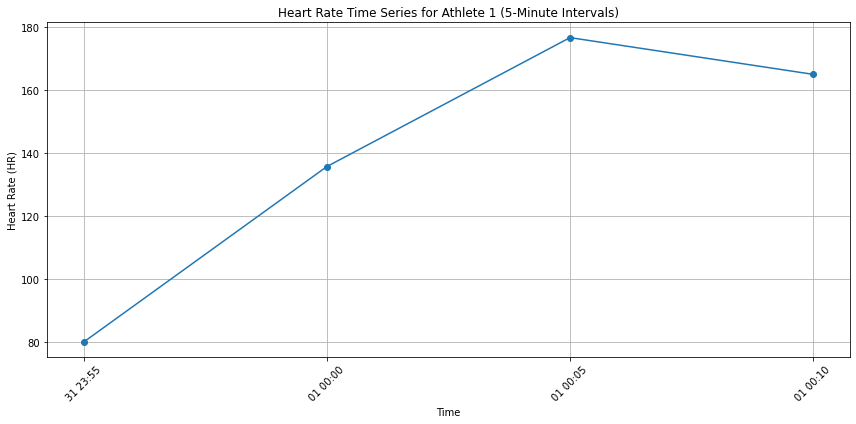

In [113]:

df = Merged_df.copy()
# Convert 'time' to datetime if it's not already
df['time'] = pd.to_datetime(df['time'], unit='s', origin='unix')  # Adjust as needed

# Filter data for athlete 1
athlete1_df = df[df['ID'] == 1]

# Set the 'time' column as the index
athlete1_df.set_index('time', inplace=True)

# Resample the data to 5-minute intervals and calculate the mean HR
resampled_df = athlete1_df['HR'].resample('5T').mean()  # '5T' stands for 5 minutes

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(resampled_df.index, resampled_df, marker='o', linestyle='-')
plt.title('Heart Rate Time Series for Athlete 1 (5-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q.37 What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [93]:
import pandas as pd

# Merge the dataframes
df = pd.merge(Merged_df, Athletes, on='ID', how='left')

# Find the maximum power
max_power = df['power'].max()

# Find the participant who achieved the maximum power
participant = df[df['power'] == max_power]

# Display the relevant information
result = participant[['First Name', 'Last Name', 'sport', 'power']].drop_duplicates()
result.columns = ['F_Name', 'L_Name', 'Sport', 'Watts']

# Print the result
print(result)

        F_Name   L_Name  Sport  Watts
3315  Isabella  Griffin  kayak  335.0


Q.38 What is the average  difference in IBI during the warm up Vs the actual test?

In [91]:
# Filter the data into warm-up and GET phases
warm_up_df = df[df['time'] < 0]
get_df = df[df['time'] >= 0]

# Calculate IBI for warm-up phase
warm_up_df['IBI'] = warm_up_df['RR'].diff().dropna()

# Calculate IBI for GET phase
get_df['IBI'] = get_df['RR'].diff().dropna()

# Calculate average IBI for each phase
avg_ibi_warm_up = warm_up_df['IBI'].mean()
avg_ibi_get = get_df['IBI'].mean()

# Calculate the difference in average IBI
avg_ibi_difference = avg_ibi_get - avg_ibi_warm_up

# Print results
print(f"Average IBI during warm-up: {avg_ibi_warm_up:.2f}")
print(f"Average IBI during GET: {avg_ibi_get:.2f}")
print(f"Difference in average IBI: {avg_ibi_difference:.2f}")

Average IBI during warm-up: -0.01
Average IBI during GET: -0.00
Difference in average IBI: 0.01


/var/folders/5w/th17csyd6r14gjdhdkkz0q0h0000gn/T/ipykernel_38801/317451703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warm_up_df['IBI'] = warm_up_df['RR'].diff().dropna()
/var/folders/5w/th17csyd6r14gjdhdkkz0q0h0000gn/T/ipykernel_38801/317451703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_df['IBI'] = get_df['RR'].diff().dropna()


Q.39 Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [25]:
# Define the array
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Print values at indexes 7 and 3
print("Value at index 7:", array[7])  # 8
print("Value at index 3:", array[3])  # 4

# Handle out-of-range index
try:
    print("Value at index 10:", array[10])
except IndexError:
    print("Index 10 is out of range.")


Value at index 7: 8
Value at index 3: 4
Index 10 is out of range.


Q.40 "     [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99"

In [26]:
# Define the array
array = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
    [26, 27, 28, 29, 30]
])

# Select the first row and pick elements 1, 3, 5 (indexes 0, 2, 4)
selected_elements = array[0, [0, 2, 4]]

# Replace values less than 4 with 99
selected_elements[selected_elements < 4] = 99

# Display the result
print("Selected elements with values less than 4 replaced by 99:", selected_elements)


Selected elements with values less than 4 replaced by 99: [99 99  5]


Q.41 What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [92]:
Merged_df=[Kayaking,Triathlon,Fencing]
Merged_df=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
df = pd.merge(Merged_df, Athletes, on='ID', how='outer')


# Find the row with the minimum wattage
min_watt_row = df.loc[df['power'].idxmin()]

# Extract the relevant information
name = min_watt_row['First Name']
sport = min_watt_row['sport']
power = min_watt_row['power']

# Display the result
print(f"Participant with the lowest wattage:\nFirstName: {name}\nSport: {sport}\nPower: {power}")

Participant with the lowest wattage:
FirstName: Isabella
Sport: kayak
Power: 0.0


Q.42 What was the difference in heart rate between warm up and GET for athlete 1

In [101]:
#  Filtering the data for athlete 1
athlete_1_data = Merged_df[Merged_df['ID'] == 1]
# Identify Warm-up and GET phases
warm_up_data = athlete_1_data[athlete_1_data['time'] < 0]  
get_data = athlete_1_data[athlete_1_data['time'] >= 0]     

#  Calculating the average HR for each phase
avg_hr_warm_up = warm_up_data['RR'].mean()
avg_hr_get = get_data['RR'].mean()

# Step 4: Compute the difference in HR between GET and Warm-up
hr_difference = avg_hr_get - avg_hr_warm_up

# Display the result
print(f"The difference in heart rate between the warm-up and GET phases for athlete 1 is {hr_difference:.2f} bpm.")

The difference in heart rate between the warm-up and GET phases for athlete 1 is -371.20 bpm.


Q.43 Create a pivot table that shows count of patients within each age group and sport

In [29]:

# Defining age groups 
def age_cat(age):
    if age < 15:
        return '12-14'
    elif 15 <= age < 17:
        return '15-17'
    else:
        return '17-18'

# Apply the categorization
Athletes['age_group'] = Athletes['age'].apply(age_cat)
# Create a pivot table
pivot_table = pd.pivot_table(Athletes, index='age_group', columns='sport', aggfunc='size', fill_value=0)



# Display the pivot table
print(pivot_table)


sport      fencing  kayak  triathlon
age_group                           
12-14            2      2          2
15-17            6      1          0
17-18            2      3          0


Q.44 Display a  distrubution chart of MAX V02 for all athletes

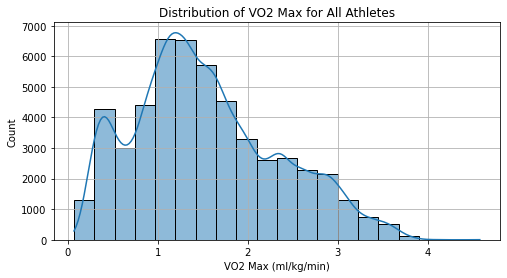

In [102]:
# Plot the distribution of VO2 max
plt.figure(figsize=(8, 4))
sns.histplot(Merged_df['VO2'], bins=20, kde=True)

# Step 2: Customize the plot
plt.title('Distribution of VO2 Max for All Athletes')
plt.xlabel('VO2 Max (ml/kg/min)')
plt.ylabel('Count')
plt.grid(True)

# Step 3: Display the plot
plt.show()


Q.45 Create a dummy array with no data with a size of 15.

In [30]:
import numpy as np

# Create a dummy array of size 15 filled with zeros
dummy_array = np.zeros(15)

dummy_array


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Q.46 How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [103]:
# Filtering the data for participant 15
athlete_15_data = Merged_df[Merged_df['ID'] == 15]

# Calculating exercise duration in minutes
exercise_duration_seconds = athlete_15_data['time'].max() - athlete_15_data['time'].min()
exercise_duration_minutes = exercise_duration_seconds / 60

# Calculating total VO2 max consumed during the test
total_vo2_max = athlete_15_data['VO2'].sum()
print(f"Participant 15 exercised for {exercise_duration_minutes:.2f} minutes.")
print(f"The total VO2 max consumed during the test was {total_vo2_max:.2f} ml/kg.")


Participant 15 exercised for 19.88 minutes.
The total VO2 max consumed during the test was 4250.44 ml/kg.


Q.47 Convert ' sport' into a numeric field through Label encoding

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sport' column in the Athletes DataFrame
Athletes['sport_encoded'] = label_encoder.fit_transform(Athletes['sport'])

# Create a mapping of the original sports to their encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label Encoding Mapping: {label_mapping}")

# Display the DataFrame with the new encoded column
print(Athletes)


Label Encoding Mapping: {'fencing': 0, 'kayak': 1, 'triathlon': 2}
      id   age  weight  height  p_vt1  p_vt2      sport  gender ethnicity  \
0    1.0  15.0    53.7   161.0   50.0  140.0    fencing  Female   African   
1    2.0  15.0    56.2   162.0   80.0  127.0    fencing    Male   African   
2    3.0  16.0    89.9   191.0  155.0  300.0    fencing    Male     White   
3    4.0  16.0    76.5   180.0  215.0  275.0    fencing    Male     White   
4    5.0  17.0    76.4   186.0  110.0  172.0    fencing  Female     White   
5    6.0  17.0    65.6   169.0  131.0  186.0    fencing  Female     White   
6    7.0  15.0    49.8   165.0   65.0  108.0    fencing  Female     White   
7    8.0  15.0    51.2   165.0   80.0  133.0    fencing  Female     White   
8    9.0  14.0    57.1   176.0   50.0  125.0    fencing  Female   African   
9   10.0  14.0    58.8   177.0  101.0  162.0    fencing  Female   African   
10  11.0  18.0    84.8   182.0  174.0  268.0      kayak  Female   African   
11  12.0 

In [34]:
Athletes

,id,age,weight,height,p_vt1,p_vt2,sport,gender,ethnicity,first name,last name,time,rr,power,vo2,age_group,sport_encoded
0,1.0,15.0,53.7,161.0,50.0,140.0,fencing,Female,African,Olivia,Martinez,NaN,NaN,NaN,NaN,15-17,0
1,2.0,15.0,56.2,162.0,80.0,127.0,fencing,Male,African,Ethan,Reynolds,NaN,NaN,NaN,NaN,15-17,0
2,3.0,16.0,89.9,191.0,155.0,300.0,fencing,Male,White,Jackson,Harper,NaN,NaN,NaN,NaN,15-17,0
3,4.0,16.0,76.5,180.0,215.0,275.0,fencing,Male,White,Liam,Sanchez,NaN,NaN,NaN,NaN,15-17,0
4,5.0,17.0,76.4,186.0,110.0,172.0,fencing,Female,White,Ava,Thompson,NaN,NaN,NaN,NaN,17-18,0
5,6.0,17.0,65.6,169.0,131.0,186.0,fencing,Female,White,Sophia,Rodriguez,NaN,NaN,NaN,NaN,17-18,0
6,7.0,15.0,49.8,165.0,65.0,108.0,fencing,Female,White,Grace,Simmons,NaN,NaN,NaN,NaN,15-17,0
7,8.0,15.0,51.2,165.0,80.0,133.0,fencing,Female,White,Aiden,Bennett,NaN,NaN,NaN,NaN,15-17,0
8,9.0,14.0,57.1,176.0,50.0,125.0,fencing,Female,African,Chloe,Price,NaN,NaN,NaN,NaN,12-14,0
9,10.0,14.0,58.8,177.0,101.0,162.0,fencing,Female,African,Lily,Jordan,NaN,NaN,NaN,NaN,12-14,0


Q.48 What was the average age of the athletes?

In [35]:

# Calculate the average age
average_age = Athletes['age'].mean()

print("Average_age is", average_age )


Average_age is 15.222222222222221
